# Insights of Google App Store


In this Project, I have just shown the difference of Rating, Reviews, Price and Rate of Installation with respect to different Categories of Applications, which are avaliable in **Google App Store.** 


In [231]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [232]:
app = pd.read_csv("googleplaystore.csv")

In [233]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [234]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [235]:
app.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

# EDA

## lets fill Null values 

In [236]:
app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

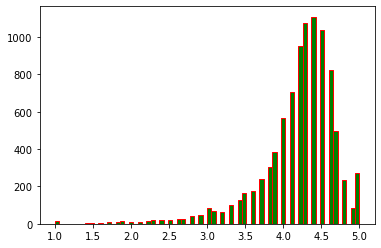

In [237]:
plt.hist(app.Rating,bins=70, edgecolor = 'r', color = 'g', range=[1,5])
plt.show()

<AxesSubplot:>

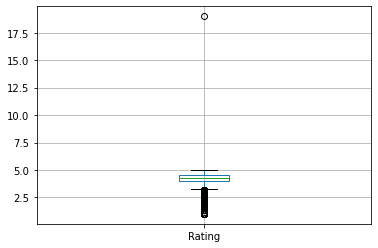

In [238]:
app.boxplot()

In [239]:
#lets remove outlier
app[app.Rating > 15]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [240]:
app.drop(10472,inplace = True)

<AxesSubplot:>

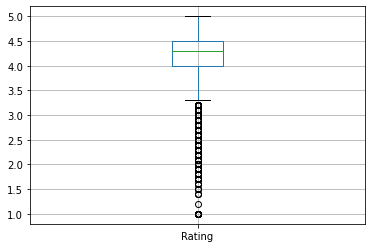

In [241]:
app.boxplot()


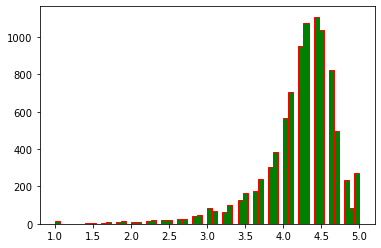

In [242]:
plt.hist(app.Rating, bins= 60, edgecolor= 'r', color = 'g', range=[1,5])
plt.show()

In [243]:
# now I will fill missing values with median 
app['Rating'].isnull().sum()

1474

In [244]:
app['Rating'] = app.Rating.fillna(app.Rating.median())

In [245]:
app['Rating'].isnull().sum()

0

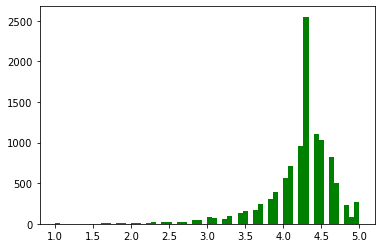

In [246]:
plt.hist(app.Rating, color = 'g', bins= 60)
plt.show()

In [247]:
app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [248]:
# In categorical Type, Current ver, Android Ver
#app[app.Type.isnull()]
#app.Type.mode()
# lets fill with mode value
#app.Type = app.Type.fillna(str(app.Type.mode()))
#app.Type.isnull().sum()

#Function
def fill(x):
    return app[x].fillna(str(app[x].mode()))

L = ['Type', 'Current Ver', 'Android Ver']
for i in L:
    app[i] = fill(i)

In [249]:
app.isnull().sum() # no null value :)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [250]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [251]:
app.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [252]:
# Reviews and Prize should also be a numeric value.
app.Reviews = pd.to_numeric(app.Reviews)
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [272]:
# as install and price have + and $ in them, so first I will remove and then convert.

app.Installs = app['Installs'].apply(lambda x: str(x).replace('+', ' ') if '+' in str(x) else str(x))
app.Installs = app['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
app.Installs = pd.to_numeric(app.Installs)
#app.Installs =app.Installs.apply(lambda x: pd.to_numeric(x))

app.Price = app['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
app.Price=pd.to_numeric(app.Price)


#a = app.Price.str.endswith('+')  ;  app[a]



'''def convert(i):
    return app[i].apply(lambda x: str(x).replace('+' or '$' , ' ') if '+' or '&' in str(x) else str(x))
L = ['Install', 'Price']
for i in L:
    app[i] = convert(i)'''

"def convert(i):\n    return app[i].apply(lambda x: str(x).replace('+' or '$' , ' ') if '+' or '&' in str(x) else str(x))\nL = ['Install', 'Price']\nfor i in L:\n    app[i] = convert(i)"

In [375]:
#lets convert size into numeric datatype
#app.Size = app['Size'].apply(lambda x: str(x).replace('M', ' ') if 'M' in str(x) else str(x))
#app.Size = pd.to_numeric(app.Size)
#run it and find the answer

In [273]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [275]:
app.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Insights 

In [276]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [377]:
grp = app.groupby('Category')
ra = grp['Rating'].agg(np.mean)
pr = grp['Price'].agg(np.sum)
ins = grp['Installs'].mean()
re = grp['Reviews'].agg(np.mean)


print('Mean Installation  of each Category.\n', ins,'\n')  #print(j)
print('maximum price of each category.\n', pr,'\n')
print('Mean Rating of each Category', ra, '\n')
print("Mean Reviews on each category \n", re)

Mean Installation  of each Category.
 Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING         

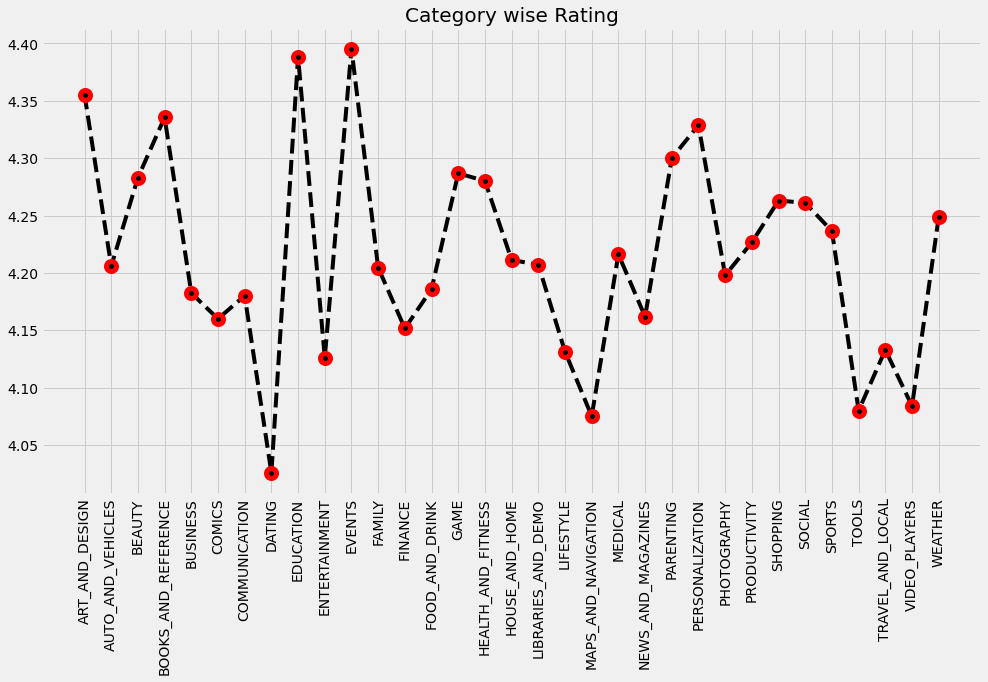

In [378]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15 ,8))
plt.plot(x, linestyle='--', marker='o', ms=10, mec='r', color='k',mew=5)
plt.xticks(rotation = 90)
plt.title('Category wise Rating', size =20)
plt.show()

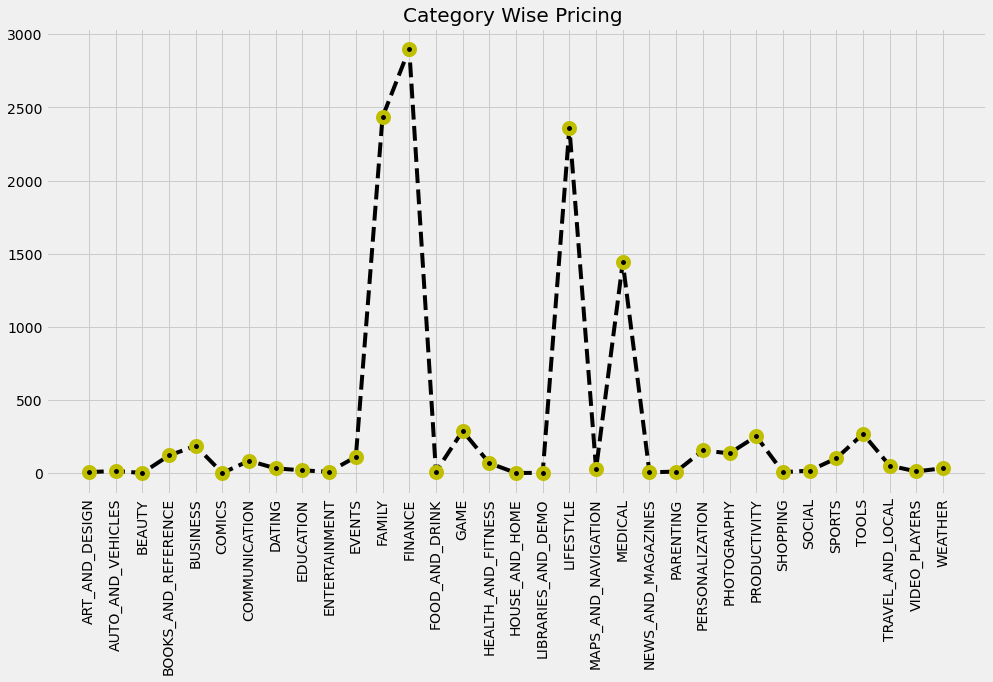

In [379]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15 ,8))
plt.plot(y, linestyle='--', marker='o', ms=10, mec='y', color='k',mew=5)
plt.xticks(rotation = 90)
plt.title('Category Wise Pricing ', size =20)
plt.show()

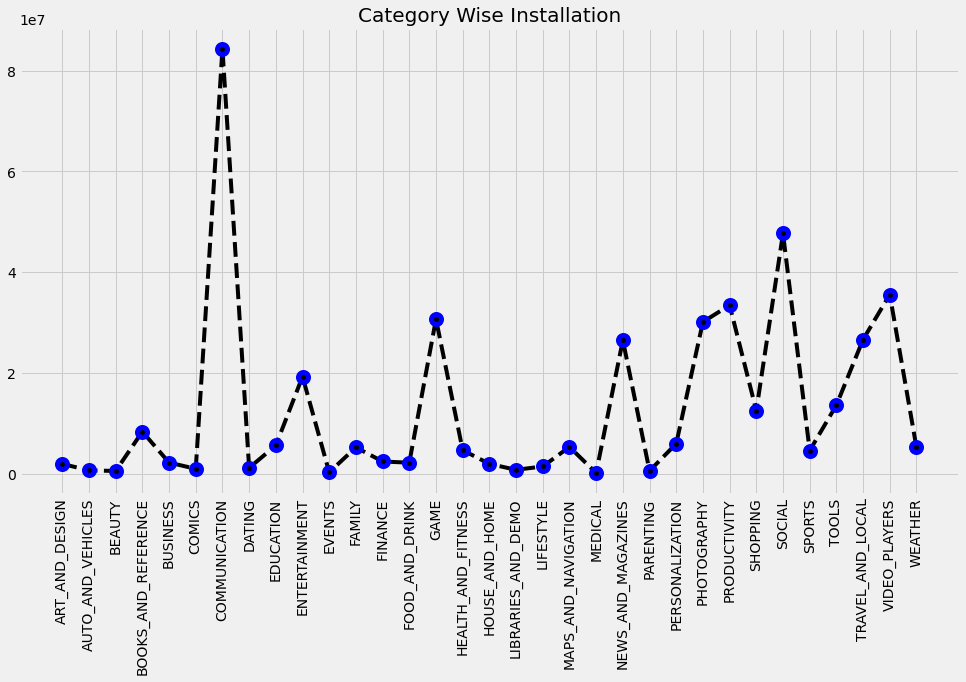

In [380]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15 ,8))
plt.plot(z, linestyle='--', marker='o', ms=10, mec='b', color='k',mew=5)
plt.xticks(rotation = 90)
plt.title('Category Wise Installation', size =20)
plt.show()

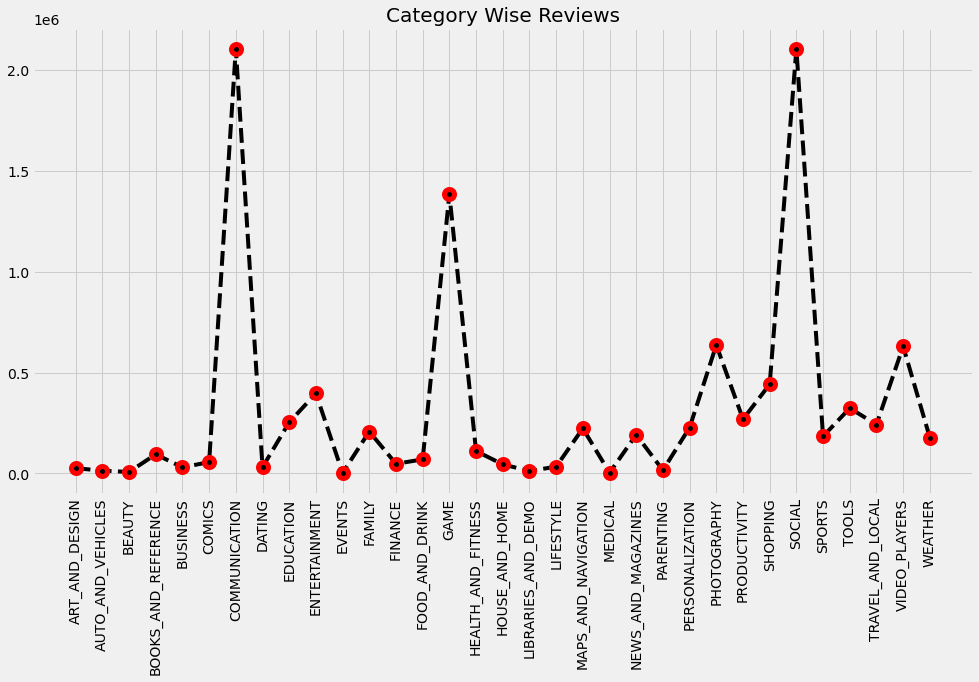

In [381]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15 ,8))
plt.plot(a, linestyle='--', marker='o', ms=10, mec='r', color='k',mew=5)
plt.xticks(rotation = 90)
plt.title('Category Wise Reviews', size =20)
plt.show()